In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report
import os

### Importing data


In [2]:
# Set current directory
curr_dir = os.getcwd()

# Load the dataset
f_path = os.path.join(curr_dir, "cancer patient data sets.csv")
data = pd.read_csv(f_path)
data.head()

,index,Patient Id,Age,Gender,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,...,Fatigue,Weight Loss,Shortness of Breath,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring,Level
0,0,P1,33,1,2,4,5,4,3,2,...,3,4,2,2,3,1,2,3,4,Low
1,1,P10,17,1,3,1,5,3,4,2,...,1,3,7,8,6,2,1,7,2,Medium
2,2,P100,35,1,4,5,6,5,5,4,...,8,7,9,2,1,4,6,7,2,High
3,3,P1000,37,1,7,7,7,7,6,7,...,4,2,3,1,4,5,6,7,5,High
4,4,P101,46,1,6,8,7,7,7,6,...,3,2,4,1,4,2,4,2,3,High


### Selecting informative features and the target variables


In [3]:
features = [
    'Age', 'Alcohol use', 'Smoking', 'chronic Lung Disease', 'Fatigue', 'Coughing of Blood', 'Chest Pain', 'Genetic Risk', 'OccuPational Hazards', 'Shortness of Breath', 'Weight Loss', 'Clubbing of Finger Nails', 'Dry Cough', 'Wheezing'
]
target = 'Level'

X = data[features]
y = data[target]

### Splitting the data into training and testing sets


In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Section 5. Ensemble Learning Methods

### Ensemble Learning Methods
We might lean towards Ensemble Learning Methods for biological data because we recognize that biological systems can be non-parametric and complex. Ensemble methods are better equipped to handle these intricate relationships between features. As datasets grow and more factors are discovered, these ensemble methods remain adaptable and effective, making them more applicable in the long term, especially in the context of studying conditions like lung cancer.

### Define Functions
**evluation_metrics** provides a comprehensive overview of the model's performance and incorporate the following metrics: accuracy, precision, recall, and F1-score. Given our multiclass classification task, we employ Macro-averaging to treat each class' metrics equally. While this approach suits our well-balanced classes, it may shift with imbalanced data in the future. Lastly we visualise the results using confusion matrices to facilitate easier detection of misclassifications and possible biases in the model's predictions.

### Model 4. Gradient Boosting Decision Tree (GBDT)

GBDT is an ensemble learning method used for both classification and regression tasks. They work by combining multiple weak learners, typically decision trees, to create a strong predictive model. <br>

*GBDT Algorithm:*
- Decision Trees as Weak Learners: The base learners (weak learners) in a GBDT model are usually decision trees. 
- Gradient Boosting: Fitting the new tree to the residuals (the differences between the actual and predicted values) of the previous tree.
- Gradient Descent Optimization: Iteratively fits a new tree to the negative gradient of the loss function with respect to the predicted values. 
- Shrinkage (Learning Rate): Control the contribution of each tree to the ensemble

*Parameters:*
- n_estimators: Number of trees in the ensemble
- learning_rate: Shrinkage parameter
- max_depth: Maximum depth of the individual trees
- min_samples_split: Minimum number of samples required to split an internal node
- min_samples_leaf: Minimum number of samples required to be at a leaf node
- subsample: Fraction of samples to be used for fitting the individual trees

### Hyperparameter tuning of Gradient Boosting Classifier

To train a Gradient Boosting Classifier with optimal hyperparameters using scikit-learn's GridSearchCV, we start by defining a parameter grid containing various hyperparameter values to search over. These hyperparameters include the number of boosting stages (**n_estimators**), the learning rate (**learning_rate**), the maximum depth of the individual regression estimators (**max_depth**), the minimum number of samples required to split an internal node (**min_samples_split**), the minimum number of samples required to be at a leaf node (**min_samples_leaf**), and the fraction of samples used for fitting the individual base learners (**subsample**.


In [5]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV

# Define the parameter grid to search
param_grid = {
    'n_estimators': [50, 100], 
    'learning_rate': [0.05, 0.1],  
    'max_depth': [3, 5],  
    'min_samples_split': [2, 5, 10],  
    'min_samples_leaf': [1, 2, 4],  
    'subsample': [0.8, 0.9, 1.0]  
}

# Initialize the GBDT model
gbdt_model = GradientBoostingClassifier(random_state=42)

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=gbdt_model, param_grid=param_grid, cv=3, scoring='accuracy')

# Perform grid search - assuming X_train and y_train are defined
grid_search.fit(X_train, y_train)

# Print the best parameters and the corresponding accuracy
print("Best Parameters:", grid_search.best_params_)
print("Best Accuracy:", grid_search.best_score_)


Best Parameters: {'learning_rate': 0.05, 'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 50, 'subsample': 0.8}
Best Accuracy: 1.0


After fitting the grid search object to the training data (**'X_train'** and **'y_train'**), we retrieve the best estimator found by accessing the **'best_estimator_'** attribute of the **'grid_search'** object. This **'best_gb_estimator'** instance represents the Gradient Boosting Classifier with the optimal hyperparameters identified through the grid search.

### Model Training and Prediction
Initialize a new model with these hyperparameters and then train it on our data.<br>
Once the model is trained, we can use it to make predictions. 

In [6]:
gbdt_model = GradientBoostingClassifier(learning_rate=0.05, 
                                           max_depth=3, 
                                           min_samples_leaf=1, 
                                           min_samples_split=2, 
                                           n_estimators=50, 
                                           subsample=0.8,
                                           random_state=42)
gbdt_model.fit(X_train, y_train)

GradientBoostingClassifier(learning_rate=0.05, n_estimators=50, random_state=42,
                           subsample=0.8)

### Evalutation of Model 4

In [7]:
y_pred = gbdt_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

Accuracy: 1.0


The GBDT model with hyperparameter tuning also predicts "Low", "Medium" and "High" Levels of Lung Cancer in patients with an Accuracy of 1.0. <br>
Accuracy is the ratio of correctly predicted instances to the total number of instances in the dataset. It measures the overall correctness of the model's predictions across all classes.

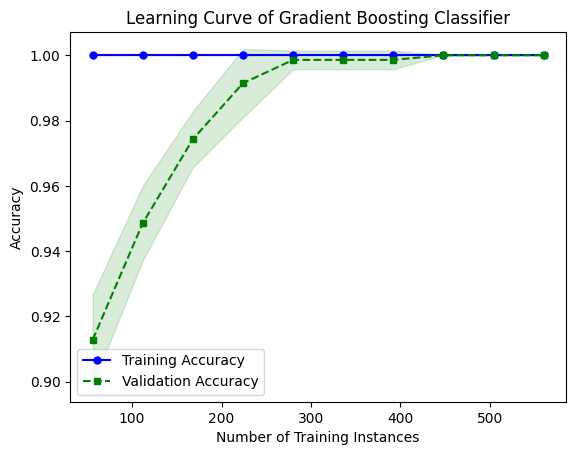

In [8]:
from sklearn.model_selection import learning_curve

train_sizes, train_scores, test_scores = learning_curve(gbdt_model, X_train, y_train, cv=5, scoring='accuracy', train_sizes=np.linspace(0.1, 1.0, 10))

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.plot(train_sizes, train_mean, color='blue', marker='o', markersize=5, label='Training Accuracy')
plt.fill_between(train_sizes, train_mean + train_std, train_mean - train_std, alpha=0.15, color='blue')
plt.plot(train_sizes, test_mean, color='green', linestyle='--', marker='s', markersize=5, label='Validation Accuracy')
plt.fill_between(train_sizes, test_mean + test_std, test_mean - test_std, alpha=0.15, color='green')

plt.xlabel('Number of Training Instances')
plt.ylabel('Accuracy')
plt.title('Learning Curve of Gradient Boosting Classifier')
plt.legend()
plt.show()


Learning curve of the Gradient Boosting Classifier using cross-validation and plot the training and validation accuracy as a function of the number of training instances.



In [9]:
# Cross-validation
cv_scores = cross_val_score(gbdt_model, X, y, cv=5, scoring='accuracy')
print(f'CV Accuracy Scores: {cv_scores}')
print(f'Mean CV Accuracy: {cv_scores.mean()}')

CV Accuracy Scores: [1. 1. 1. 1. 1.]
Mean CV Accuracy: 1.0


The accuracy scores obtained for each fold of the cross-validation process is 1.0, it suggests that the model achieved perfect accuracy on each fold of the cross-validation. A perfect accuracy score of 1.0 means that the model correctly classified all instances in the validation set for that fold.

In [11]:
# Displaying the importance of each feature
feature_importance = pd.DataFrame(gbdt_model.feature_importances_, index=X_train.columns, columns=['importance'])
feature_importance = feature_importance.sort_values('importance', ascending=False)
print(feature_importance)

                          importance
Coughing of Blood           0.282139
Fatigue                     0.160009
Alcohol use                 0.150196
Wheezing                    0.142269
Smoking                     0.106413
Age                         0.039293
OccuPational Hazards        0.035426
Clubbing of Finger Nails    0.035293
Chest Pain                  0.022061
chronic Lung Disease        0.011044
Dry Cough                   0.008190
Shortness of Breath         0.003021
Weight Loss                 0.002713
Genetic Risk                0.001934


GBDT typically assigns higher importance to features that are more effective at reducing the model's loss function during the boosting process. GBDT tends to concentrate importance on a subset of features that are particularly informative or predictive. This concentration occurs because the model sequentially builds a series of weak learners (usually decision trees) where each subsequent learner focuses on minimizing the residual errors made by the previous learners. 

Consequently, features that are more effective at reducing these errors receive higher importance weights, leading to a more concentrated feature importance distribution. As a result, GBC often identifies a smaller set of key features that have the most significant impact on model performance, providing insights into the most influential predictors in the dataset. This concentrated feature importance can be advantageous for interpretability and understanding the underlying mechanisms driving predictions.

In [38]:
from sklearn.metrics import confusion_matrix

 Precision: 1.00, Recall: 1.00, F1-score: 1.00


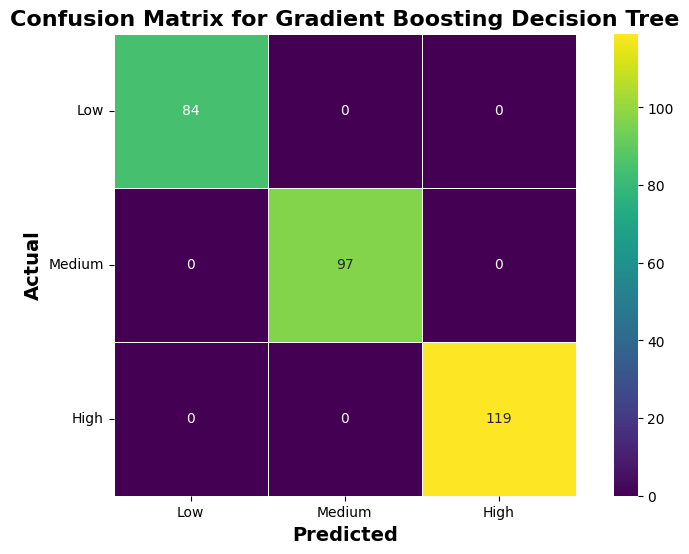

In [39]:
from sklearn.metrics import precision_recall_fscore_support, confusion_matrix

def evaluation_metrics(y_test, y_pred, model_name , average_type=None): #choices for average_type: {‘binary’, ‘micro’, ‘macro’}
    scores=precision_recall_fscore_support(y_test, y_pred, average=average_type)
    print(f" Precision: {scores[0]:.2f}, Recall: {scores[1]:.2f}, F1-score: {scores[2]:.2f}")
    confusion_scores_matrix = confusion_matrix(y_test, y_pred)
    unique_labels = ["Low", "Medium", "High"]
    sorted_label_ind=[sorted(unique_labels).index(x) for x in unique_labels]
    confusion_scores_matrix_sorted = confusion_scores_matrix[:, sorted_label_ind][sorted_label_ind, :]
    plt.figure(figsize=(10, 6))
    # unique_labels = np.unique(np.concatenate((y_true, y_pred)))
    sns.heatmap(
        
        confusion_scores_matrix_sorted, annot=True, fmt='d', cmap='viridis', linewidths=0.4, square=True, cbar=True,
        xticklabels=["Low", "Medium","High"],
        yticklabels=["Low", "Medium","High"]
    )
    
    # ax.set_title(f'Confusion Matrix for {model_name}', fontsize=16, fontweight='bold')
    plt.title(f'Confusion Matrix for {model_name}', fontsize=16, fontweight='bold')
    plt.xlabel('Predicted', fontsize=14, fontweight='bold')
    plt.ylabel('Actual', fontsize=14, fontweight='bold')
    plt.yticks(rotation=360)
    plt.show()

evaluation_metrics(y_test, y_pred, 'Gradient Boosting Decision Tree', average_type='macro')

_Figure X. The confusion matrix for Gradient Boosting Decision Tree. The heatmap displays the classification results with "Low," "Medium," and "High" labels, while the side labels indicate the counts for each prediction._

Precision, recall, and F1-score are all 1.00, indicating perfect performance for the "High" class. There are 119 instances of this class. Similarly, perfect scores are achieved for precision, recall, and F1-score for the "Low" class. There are 84 instances of this class. Again, perfect scores for precision, recall, and F1-score for the "Medium" class, with 97 instances.

Overall accuracy of the model is also reported as 1.00, indicating perfect accuracy across all classes.


### Model 5. Random Forest Classifier
Random Forest Classifier is an ensemble learning technique that builds numerous decision trees during training and uses the most common class prediction among the trees for classification tasks. By aggregating predictions from multiple trees, it improves accuracy and resilience in making predictions.

*RF Algorithm:*

- Bootstrap Sampling: Random Forest builds multiple decision trees by sampling, with replacement, from the training dataset (bootstrap sampling).
- Feature Randomization: At each node of the tree, a random subset of features is considered for splitting, adding diversity to the trees.
- Voting Mechanism: For classification, the mode (most frequent class) among the trees is the final predicted class.
- Ensemble Learning: Random Forest is an ensemble learning method that combines the predictions of multiple decision trees to improve predictive performance and robustness. 

*Parameters:*

- n_estimators: Number of trees in the forest. Higher values generally lead to better performance.
- criterion: The function to measure the quality of a split. 'gini' for Gini impurity or 'entropy' for information gain.
- max_depth: Maximum depth of the individual trees. Controls the complexity of each tree.
- min_samples_split: Minimum number of samples required to split an internal node.
- min_samples_leaf: Minimum number of samples required to be at a leaf node.
- class_weight: Weights associated with classes in the form {class_label: weight}.

### Hyperparameter tuning 


Hyperparameter tuning for a Random Forest Classifier using GridSearchCV from scikit-learn (sklearn). <br>
The **'fit'** method of GridSearchCV fits the RandomForestClassifier on the training data (**'X_train'** and **'y_train'**) while trying out different combinations of hyperparameters defined in the 'parameters' dictionary.
<br>
Retrieve Best Estimator: After fitting, the **'best_estimator_'** attribute of the clf object provides the best estimator found by the GridSearchCV after performing the grid search over the specified hyperparameter space. The best estimator would be a RandomForestClassifier instance with the hyperparameters that yield the highest performance based on cross-validation.

In [27]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

parameters = {'max_depth':[2,10,50],
             'n_estimators':[1,10,100,500,1000]}

rdf = RandomForestClassifier(random_state=0)


clf = GridSearchCV(rdf, parameters)
clf.fit(X_train, y_train)
clf.best_estimator_

RandomForestClassifier(max_depth=10, n_estimators=1, random_state=0)

### Manual exploration for hyperparameters in Random Forest
Using cross-validation, we visualize the analysis of different hyperparameter configurations for a Random Forest model by organizing and presenting the results in a tabular format, making it easier to identify the most effective parameter settings.

In [28]:
results_df = pd.DataFrame(clf.cv_results_)
results_df = results_df.sort_values(by=["rank_test_score"])
results_df = results_df.set_index(
    results_df["params"].apply(lambda x: "_".join(str(val) for val in x.values()))
).rename_axis("kernel")
results_df[["params", "rank_test_score", "mean_test_score", "std_test_score"]]

,params,rank_test_score,mean_test_score,std_test_score
kernel,,,,
10_1,"{'max_depth': 10, 'n_estimators': 1}",1,1.000000,0.000000
10_10,"{'max_depth': 10, 'n_estimators': 10}",1,1.000000,0.000000
10_100,"{'max_depth': 10, 'n_estimators': 100}",1,1.000000,0.000000
10_500,"{'max_depth': 10, 'n_estimators': 500}",1,1.000000,0.000000
10_1000,"{'max_depth': 10, 'n_estimators': 1000}",1,1.000000,0.000000
50_1,"{'max_depth': 50, 'n_estimators': 1}",1,1.000000,0.000000
50_10,"{'max_depth': 50, 'n_estimators': 10}",1,1.000000,0.000000
50_100,"{'max_depth': 50, 'n_estimators': 100}",1,1.000000,0.000000
50_500,"{'max_depth': 50, 'n_estimators': 500}",1,1.000000,0.000000


In [29]:
model_scores = results_df.filter(regex=r"split\d*_test_score")

_Table X: Result table of an exhaustive exploration of hyperparameter combinations for a Random Forest model._ 

Notably, configurations with a max depth of 10 or 50, paired with various numbers of estimators, consistently achieved the top rank with perfect test scores and minimal variance. This suggests that these depth values effectively capture the complexity of the dataset, while increasing the number of estimators beyond a certain threshold doesn't significantly enhance performance. <br>

Conversely, configurations with a max depth of 2 generally performed less optimally, indicating the importance of sufficient depth for capturing underlying patterns in the data. Despite variations in hyperparameters, the Random Forest model demonstrates robustness, consistently achieving high test scores across different configurations. 

These findings underscore the importance of carefully tuning hyperparameters to optimize model performance, with an emphasis on balancing depth and the number of estimators in Random Forest models for effective predictive accuracy.

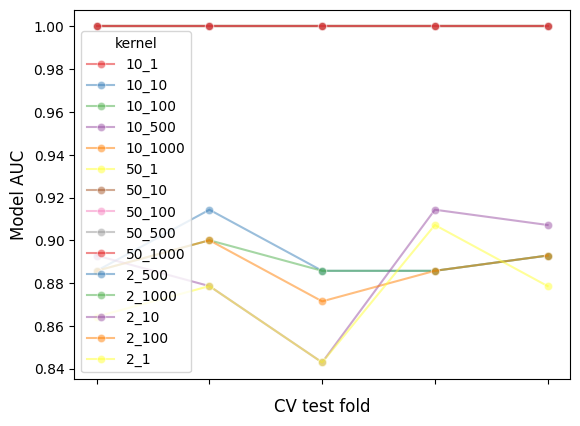

In [30]:
fig, ax = plt.subplots()
sns.lineplot(
    data=model_scores.transpose().iloc[:],
    dashes=False,
    palette="Set1",
    marker="o",
    alpha=0.5,
    ax=ax,
)
ax.set_xlabel("CV test fold", size=12, labelpad=10)
ax.set_ylabel("Model AUC", size=12)
ax.tick_params(bottom=True, labelbottom=False)
plt.show()

_Figure x: Line plot visualizing the cross-validation (CV) test fold results for multiple models._

Each line represents the area under the receiver operating characteristic curve (AUC) across different folds. The x-axis represents the CV test fold, while the y-axis indicates the model AUC. The use of markers, palette, and transparency enhances readability and distinguishes between multiple lines corresponding to different models. By displaying AUC values across CV folds, the plot offers insights into the consistency and variability of model performance. A consistent upward trend or plateau across folds suggests stable and robust performance, while erratic fluctuations may indicate instability or sensitivity to specific data subsets.

### Model Training and Prediction


In [31]:
rf_model = RandomForestClassifier(max_depth=10, n_estimators=1, random_state=0)
rf_model.fit(X_train, y_train)

RandomForestClassifier(max_depth=10, n_estimators=1, random_state=0)

In [32]:
y_pred = rf_model.predict(X_test)

### Evalutation of Model 5

In [33]:
# Displaying the importance of each feature
feature_importance = pd.DataFrame(rf_model.feature_importances_, index=X_train.columns, columns=['importance'])
feature_importance = feature_importance.sort_values('importance', ascending=False)
print(feature_importance)


                          importance
OccuPational Hazards        0.282171
Fatigue                     0.211447
Dry Cough                   0.147631
Smoking                     0.140221
chronic Lung Disease        0.059554
Genetic Risk                0.050361
Alcohol use                 0.037524
Weight Loss                 0.027913
Chest Pain                  0.017764
Wheezing                    0.012885
Shortness of Breath         0.012527
Age                         0.000000
Coughing of Blood           0.000000
Clubbing of Finger Nails    0.000000




Random Forest has a tendency to distribute feature importance more evenly compared to some other models, especially when features are highly correlated with the target variable. This behavior stems from the nature of how Random Forest calculates feature importance. In a Random Forest model, feature importance is typically determined by measuring the decrease in impurity (e.g., Gini impurity) when a particular feature is used for splitting nodes in the trees of the forest.

When features are highly correlated with the target variable, they tend to be selected more frequently for splitting nodes across different trees in the forest, leading to a more equitable distribution of importance among correlated features. This can result in a situation where multiple features contribute significantly to the predictive power of the model, rather than one or a few features dominating the importance ranking. As a result, Random Forest models often provide a more nuanced understanding of feature importance, particularly in scenarios where multiple features are informative predictors of the target variable.

 Precision: 1.00, Recall: 1.00, F1-score: 1.00


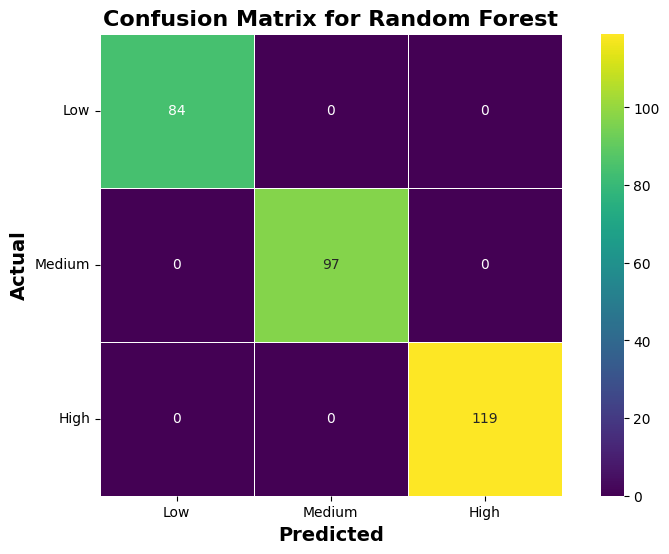

In [34]:
from sklearn.metrics import precision_recall_fscore_support, confusion_matrix

def evaluation_metrics(y_test, y_pred, model_name, average_type=None): #choices for average_type: {‘binary’, ‘micro’, ‘macro’}
    scores=precision_recall_fscore_support(y_test, y_pred, average=average_type)
    print(f" Precision: {scores[0]:.2f}, Recall: {scores[1]:.2f}, F1-score: {scores[2]:.2f}")
    confusion_scores_matrix = confusion_matrix(y_test, y_pred)
    unique_labels = ["Low", "Medium", "High"]
    sorted_label_ind=[sorted(unique_labels).index(x) for x in unique_labels]
    confusion_scores_matrix_sorted = confusion_scores_matrix[:, sorted_label_ind][sorted_label_ind, :]
    plt.figure(figsize=(10, 6))
    # unique_labels = np.unique(np.concatenate((y_true, y_pred)))
    sns.heatmap(
        
        confusion_scores_matrix_sorted, annot=True, fmt='d', cmap='viridis', linewidths=0.4, square=True, cbar=True,
        xticklabels=["Low", "Medium","High"],
        yticklabels=["Low", "Medium","High"]
    )
    
    # ax.set_title(f'Confusion Matrix for {model_name}', fontsize=16, fontweight='bold')
    plt.title(f'Confusion Matrix for {model_name}', fontsize=16, fontweight='bold')
    plt.xlabel('Predicted', fontsize=14, fontweight='bold')
    plt.ylabel('Actual', fontsize=14, fontweight='bold')
    plt.yticks(rotation=360)
    plt.show()

evaluation_metrics(y_test, y_pred, 'Random Forest', average_type='macro')

_Figure X. The confusion matrix for Random Forest. The heatmap displays the classification results with "Low," "Medium," and "High" labels, while the side labels indicate the counts for each prediction._

Similar to the baseline model, the Logistic Regression approach and GBDT, the Random Forest model achieves flawless classification accuracy on the test set, as evident from the absence of misclassifications depicted in the confusion matrix (Figure X2). Consequently, precision, recall, and F1-score all reach a value of 1. This reaffirms the effectiveness of employing ensemble methods, such as Random Forest, for predicting lung cancer occurrence in the dataset.